In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [2]:
start="2013-01-01"
end="2022-12-31"

df = pdr.DataReader("TSLA", start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [3]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
1,2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2,2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
3,2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
4,2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [4]:
df= df.drop(['Date','Adj Close'], axis=1)
df

,Open,High,Low,Close,Volume
0,2.333333,2.363333,2.314000,2.357333,17922000
1,2.345333,2.363333,2.316667,2.318000,11130000
2,2.320000,2.320000,2.261333,2.293333,10110000
3,2.320000,2.320000,2.260000,2.289333,6630000
4,2.300000,2.300000,2.207333,2.245333,19260000
...,...,...,...,...,...
2513,126.370003,128.619995,121.019997,123.150002,166989700
2514,117.500000,119.669998,108.760002,109.099998,208643400
2515,110.349998,116.269997,108.239998,112.709999,221070500
2516,120.389999,123.570000,117.500000,121.820000,221923300


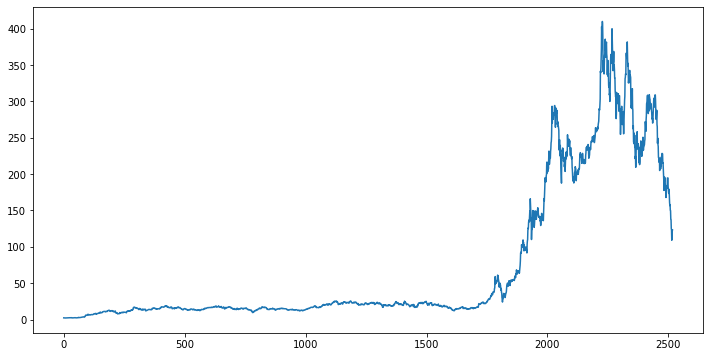

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)

In [6]:
#moving average of 100 days 
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    234.019467
2514    232.024134
2515    230.269534
2516    228.583501
2517    226.981967
Name: Close, Length: 2518, dtype: float64

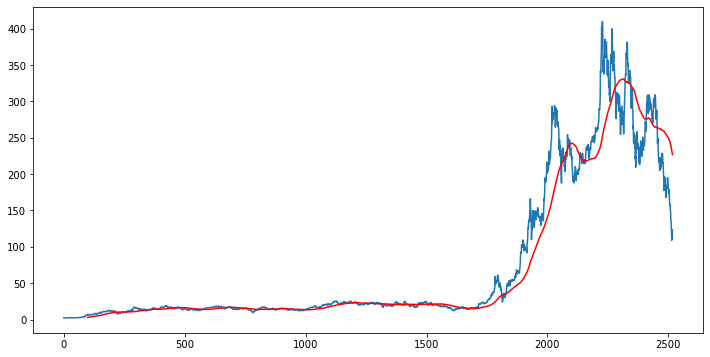

In [7]:
#plot moving avg  of 100
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [8]:
#moving average of 200 days 
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2513    255.097317
2514    254.317234
2515    253.603501
2516    252.876117
2517    252.091634
Name: Close, Length: 2518, dtype: float64

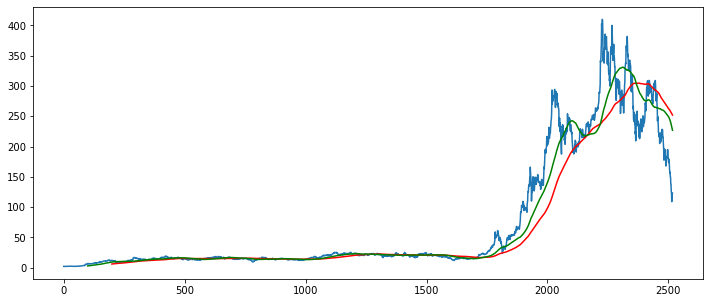

In [9]:
#plot moving avg  of 200
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'g')

In [10]:
df.shape

(2518, 5)

In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [12]:
'''#splitting data into training and testing
from sklearn.model_selection import train_test_split'''

'#splitting data into training and testing\nfrom sklearn.model_selection import train_test_split'

In [12]:
'''#splitting data into training and testing'''
data_training= pd.DataFrame(df.Close[0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df.Close[int((len(df)*0.70)):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1762, 1)
(756, 1)


In [13]:
data_training

,Close
0,2.357333
1,2.318000
2,2.293333
3,2.289333
4,2.245333
...,...
1757,28.350000
1758,28.729334
1759,28.691999
1760,27.646667


In [14]:
data_testing

,Close
1762,28.684000
1763,29.534000
1764,30.102667
1765,31.270666
1766,32.809334
...,...
2513,123.150002
2514,109.099998
2515,112.709999
2516,121.820000


In [15]:
#scaling b/w 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.0061553 ],
       [0.00467302],
       [0.00374343],
       ...,
       [0.99859303],
       [0.95919907],
       [0.96831893]])

In [17]:
data_training_array.shape

(1762, 1)

In [18]:
#here our features are 100 days i.e first 100 days are x_train and 101th day will be ours y_train
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0]) ## 0 here bcoz of 1 columns in df

In [19]:
x_train

[array([[0.0061553 ],
        [0.00467302],
        [0.00374343],
        [0.00359269],
        [0.00193451],
        [0.00183404],
        [0.00155766],
        [0.        ],
        [0.00087932],
        [0.00248725],
        [0.00298971],
        [0.00369319],
        [0.00404491],
        [0.00572821],
        [0.00776324],
        [0.01025049],
        [0.01022535],
        [0.01286334],
        [0.01266236],
        [0.01158203],
        [0.01155693],
        [0.01354168],
        [0.01213476],
        [0.01311459],
        [0.01572744],
        [0.01650629],
        [0.01590332],
        [0.01384316],
        [0.01251162],
        [0.01391854],
        [0.01346631],
        [0.01037609],
        [0.01600383],
        [0.01414465],
        [0.00565284],
        [0.00803958],
        [0.00369319],
        [0.00381879],
        [0.00550209],
        [0.00482376],
        [0.00437153],
        [0.00670804],
        [0.00939626],
        [0.01200915],
        [0.01336584],
        [0

In [20]:
y_train

[0.19450792933737798,
 0.18018741468174726,
 0.1809913877751722,
 0.16292740260436067,
 0.14993845715353074,
 0.15559130087096396,
 0.15692283413597513,
 0.16189733229454162,
 0.17368038998481333,
 0.16868075194341942,
 0.15466170024298082,
 0.16285203686556263,
 0.1639825948271124,
 0.1693088536764208,
 0.17408234059173622,
 0.17707208183935746,
 0.18031304221630545,
 0.17018817453874896,
 0.16742456644731146,
 0.1722985589842524,
 0.1745848327600742,
 0.18292590086025207,
 0.19179456507180587,
 0.18704618209952828,
 0.21171769758889925,
 0.21332564377574909,
 0.20684370505195826,
 0.21902869537925806,
 0.2228475136633421,
 0.2274702691010615,
 0.22450566773626773,
 0.23289699763220578,
 0.24367508895569634,
 0.23704243672420422,
 0.19129210884325748,
 0.21943071786576013,
 0.21636557493955128,
 0.2179986430393338,
 0.2249076542829802,
 0.22568650546347246,
 0.2230736108797362,
 0.22902793552225637,
 0.2423937995165505,
 0.25553349441487133,
 0.24829788033320532,
 0.254679277495581,
 

In [21]:
x_train, y_train = np.array(x_train), np.array(y_train)
print('X_train:',x_train,y_train)

X_train: [[[0.0061553 ]
  [0.00467302]
  [0.00374343]
  ...
  [0.13649725]
  [0.15029018]
  [0.161219  ]]

 [[0.00467302]
  [0.00374343]
  [0.00359269]
  ...
  [0.15029018]
  [0.161219  ]
  [0.19450793]]

 [[0.00374343]
  [0.00359269]
  [0.00193451]
  ...
  [0.161219  ]
  [0.19450793]
  [0.18018741]]

 ...

 [[0.49704795]
  [0.50375596]
  [0.51601639]
  ...
  [0.97055496]
  [0.98570459]
  [1.        ]]

 [[0.50375596]
  [0.51601639]
  [0.50775064]
  ...
  [0.98570459]
  [1.        ]
  [0.99859303]]

 [[0.51601639]
  [0.50775064]
  [0.49267641]
  ...
  [1.        ]
  [0.99859303]
  [0.95919907]]] [0.19450793 0.18018741 0.18099139 ... 0.99859303 0.95919907 0.96831893]


In [22]:
x_train.shape

(1662, 100, 1)

In [23]:
#ml model
import tensorflow as tf

In [24]:
tf.__version__

'2.10.1'

In [25]:
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=90, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=1,activation='sigmoid'))

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
52/52 [==============================] - 41s 629ms/step - loss: 0.0188
Epoch 2/10
52/52 [==============================] - 34s 644ms/step - loss: 0.0073
Epoch 3/10
52/52 [==============================] - 30s 584ms/step - loss: 0.0040
Epoch 4/10
52/52 [==============================] - 30s 579ms/step - loss: 0.0034
Epoch 5/10
52/52 [==============================] - 30s 573ms/step - loss: 0.0032
Epoch 6/10
52/52 [==============================] - 31s 602ms/step - loss: 0.0029
Epoch 7/10
52/52 [==============================] - 30s 582ms/step - loss: 0.0030
Epoch 8/10
52/52 [==============================] - 30s 583ms/step - loss: 0.0027
Epoch 9/10
52/52 [==============================] - 30s 570ms/step - loss: 0.0027
Epoch 10/10
52/52 [==============================] - 30s 572ms/step - loss: 0.0026


In [28]:
model.save('tensor_model.h5')

In [29]:
data_testing.head()

,Close
1762,28.684000
1763,29.534000
1764,30.102667
1765,31.270666
1766,32.809334


In [30]:
data_training.tail(10)

,Close
1752,25.266001
1753,26.209999
1754,26.936001
1755,27.039333
1756,27.948000
1757,28.350000
1758,28.729334
1759,28.691999
1760,27.646667
1761,27.888666


In [31]:
past_100_days= data_training.tail(100)

In [32]:
final_testing = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Hari\AppData\Local\Temp\ipykernel_18860\2753386827.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_testing = past_100_days.append(data_testing, ignore_index=True)


In [33]:
final_testing.head()

,Close
0,15.667333
1,15.267333
2,15.666667
3,14.641333
4,14.376000


In [34]:
input_data = scaler.fit_transform(final_testing)
input_data

array([[3.97598427e-03],
       [2.96556954e-03],
       [3.97430278e-03],
       [1.38426795e-03],
       [7.14028340e-04],
       [1.43816010e-03],
       [2.59845194e-03],
       [2.43510120e-03],
       [1.58803721e-03],
       [1.81032941e-03],
       [0.00000000e+00],
       [6.06248841e-04],
       [4.51320027e-04],
       [7.05608819e-04],
       [1.73623281e-03],
       [2.39300119e-03],
       [2.29195971e-03],
       [1.56277624e-03],
       [3.06155930e-03],
       [2.70286122e-03],
       [3.43373101e-03],
       [4.06524082e-03],
       [6.01197370e-03],
       [5.80483663e-03],
       [5.69200782e-03],
       [5.28952343e-03],
       [5.62296053e-03],
       [5.40404336e-03],
       [5.92777367e-03],
       [4.92072193e-03],
       [5.02345212e-03],
       [1.98883529e-03],
       [2.91336610e-03],
       [5.24742823e-03],
       [5.17501313e-03],
       [4.96282676e-03],
       [5.60612631e-03],
       [5.34341799e-03],
       [3.64254717e-03],
       [3.37310565e-03],


In [35]:
input_data.shape

(856, 1)

In [36]:
x_test = []
y_test= []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0]) ## 0 here bcoz of 1 columns in df

In [37]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


##Making prediction

In [38]:
y_pred = model.predict(x_test)
y_pred

24/24 [==============================] - 2s 77ms/step


array([[0.17261477],
       [0.17288919],
       [0.1731721 ],
       [0.17346515],
       [0.1737766 ],
       [0.17411794],
       [0.17447257],
       [0.17483202],
       [0.17522664],
       [0.17565662],
       [0.17609699],
       [0.1765368 ],
       [0.17696767],
       [0.17741321],
       [0.17788278],
       [0.17836958],
       [0.17885962],
       [0.17934085],
       [0.17981513],
       [0.18028812],
       [0.18080088],
       [0.18134958],
       [0.18202482],
       [0.18289286],
       [0.18379478],
       [0.1847249 ],
       [0.18566264],
       [0.18661085],
       [0.18755598],
       [0.18847838],
       [0.18939827],
       [0.19029981],
       [0.19122244],
       [0.19220103],
       [0.19320081],
       [0.19420746],
       [0.19514939],
       [0.19599336],
       [0.19672266],
       [0.19725859],
       [0.19761382],
       [0.19787824],
       [0.19806641],
       [0.19819455],
       [0.19825332],
       [0.19823846],
       [0.19808604],
       [0.197

In [39]:
y_test

array([0.0368566 , 0.03900373, 0.04044021, 0.04339062, 0.04727735,
       0.0454586 , 0.0449214 , 0.05278748, 0.05498682, 0.05171644,
       0.05087274, 0.05036922, 0.0565496 , 0.06031509, 0.06075967,
       0.05951685, 0.05837171, 0.05986712, 0.06223992, 0.07231377,
       0.07395738, 0.09575373, 0.11378291, 0.08812509, 0.09052651,
       0.09037663, 0.09428526, 0.0948073 , 0.09361333, 0.09979539,
       0.09912684, 0.10895649, 0.11889561, 0.11586268, 0.11613044,
       0.1048121 , 0.09910662, 0.09555164, 0.07874506, 0.07689095,
       0.08962725, 0.08994553, 0.09061745, 0.08641412, 0.08286756,
       0.06678848, 0.07307495, 0.07120568, 0.05879777, 0.05645193,
       0.03935064, 0.03684649, 0.02523008, 0.03641538, 0.03639686,
       0.03753526, 0.04944301, 0.0552108 , 0.05334321, 0.05101926,
       0.0489597 , 0.05264266, 0.04549565, 0.04093363, 0.04523463,
       0.05133585, 0.0562549 , 0.05682578, 0.06089439, 0.07402137,
       0.08394702, 0.08730497, 0.089895  , 0.09135674, 0.09008

In [40]:
y_pred.shape

(756, 1)

In [41]:
scaler.scale_ #factor by all values are scale down

array([0.00252604])

In [42]:
scle_factr = 1/0.00252604
y_pred= y_pred*scle_factr
y_test = y_test*scle_factr

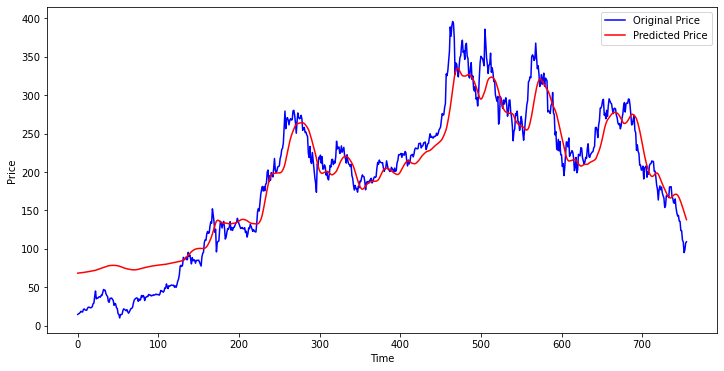

In [43]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_pred, 'r', label='Predicted Price')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()